In [2]:
# import libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt, matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn import svm
%matplotlib inline

# import the training data
labeled_images = pd.read_csv('train.csv')

# separate the training data into the pixel array and the label matrix (X,Y)
train_images = labeled_images.iloc[0:,1:]
train_labels = labeled_images.iloc[0:,:1]

# change the image from gray scale to black and white to make the classifier run more efficiently
train_images[train_images>0]=1

In [3]:
# Question 1.(a) Display one of each digit

# function to find the position of a given digit within a data set
def find_first_num(labels, num):
    for i in range(0,len(labels)):
        if train_labels.iloc[i,0]==num:
            return i

# function to show a plotted image of the digit given it's position in the training data set
def show_digit(trainer, labels, i):
    img=trainer.iloc[i].as_matrix()
    img=img.reshape((28,28))
    plt.imshow(img,cmap='binary')
    plt.title(labels.iloc[i,0])


/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


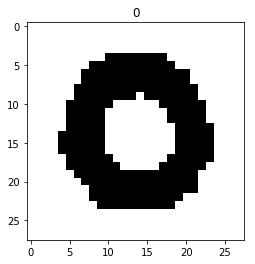

In [4]:
# find the indices for each digit and plot their image
index = find_first_num(train_labels, 0)
show_digit(train_images, train_labels, index)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


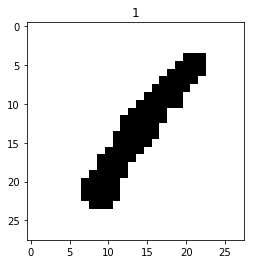

In [5]:
index = find_first_num(train_labels, 1)
show_digit(train_images, train_labels, index)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


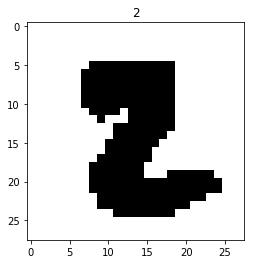

In [6]:
index = find_first_num(train_labels, 2)
show_digit(train_images, train_labels, index)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


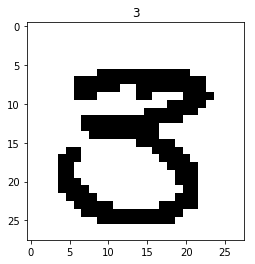

In [7]:
index = find_first_num(train_labels, 3)
show_digit(train_images, train_labels, index)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


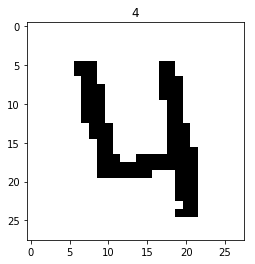

In [8]:
index = find_first_num(train_labels, 4)
show_digit(train_images, train_labels, index)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


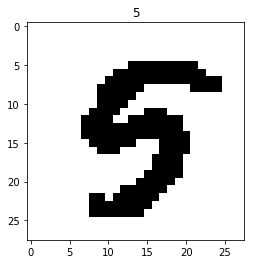

In [9]:
index = find_first_num(train_labels, 5)
show_digit(train_images, train_labels, index)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


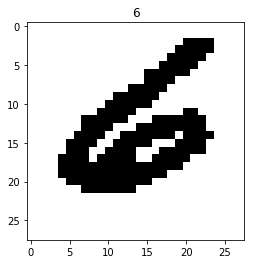

In [10]:
index = find_first_num(train_labels, 6)
show_digit(train_images, train_labels, index)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


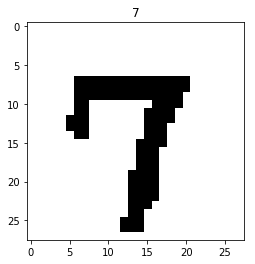

In [11]:
index = find_first_num(train_labels, 7)
show_digit(train_images, train_labels, index)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


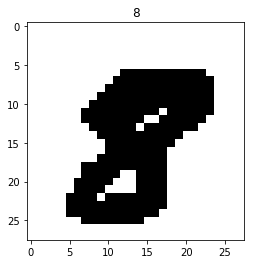

In [12]:
index = find_first_num(train_labels, 8)
show_digit(train_images, train_labels, index)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


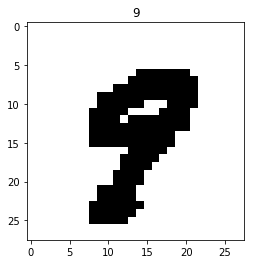

In [13]:
index = find_first_num(train_labels, 9)
show_digit(train_images, train_labels, index)

In [14]:
# Question 1.(c)

# calculate how many times a digit appears within the training data and establish it's prior probability

for z in range(0,10):
    x=0
    for i in range(0,len(train_labels)):
        if train_labels.iloc[i,0]==z:
            x=x+1
    
    y = float(x) / float(len(train_labels))        
    
    print("The count for " + str(z) + " is " + str(x))
    print("The prior probability for "+ str(z) + " is " + str(y))

The count for 0 is 4132
The prior probability for 0 is 0.098380952381
The count for 1 is 4684
The prior probability for 1 is 0.111523809524
The count for 2 is 4177
The prior probability for 2 is 0.0994523809524
The count for 3 is 4351
The prior probability for 3 is 0.103595238095
The count for 4 is 4072
The prior probability for 4 is 0.0969523809524
The count for 5 is 3795
The prior probability for 5 is 0.0903571428571
The count for 6 is 4137
The prior probability for 6 is 0.0985
The count for 7 is 4401
The prior probability for 7 is 0.104785714286
The count for 8 is 4063
The prior probability for 8 is 0.0967380952381
The count for 9 is 4188
The prior probability for 9 is 0.0997142857143


In [15]:
# put all the label values into an array so that their probability can be easily plot on a histogram
label_array=[]
for i in range(0,len(train_labels)):
    label_array.append(train_labels.iloc[i,0]);

/Users/Meera/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(array([0.10931217, 0.12391534, 0.11050265, 0.11510582, 0.10772487,
        0.10039683, 0.10944444, 0.11642857, 0.10748677, 0.11079365]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

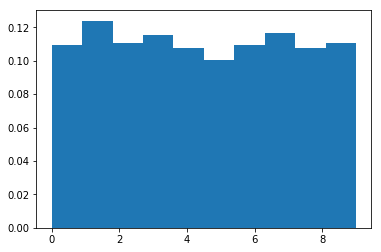

In [16]:
plt.hist(label_array,normed='true')

In [17]:
# Question 1.(d)

# import libraries needed for this question
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
import numpy

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


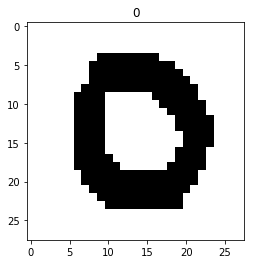

In [18]:
# find the euclidean distance between the first occurance of the digit and every other image in the training data
# and plot it to verify it is the correct match

index = find_first_num(train_labels, 0)
dist = distance.cdist(train_images, train_images.iloc[[index]], 'euclidean')

t=0

for i in range(len(dist)):
    if dist[i] != 0:
        if dist[i]<dist[t]:
            t=i
            
show_digit(train_images, train_labels, t)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


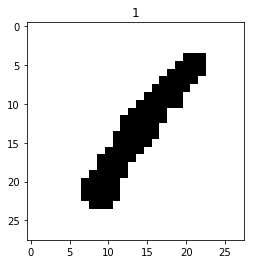

In [19]:
index = find_first_num(train_labels, 1)
dist = distance.cdist(train_images, train_images.iloc[[index]], 'euclidean')

t=0

for i in range(len(dist)):
    if dist[i] != 0:
        if dist[i]<dist[t]:
            t=i
            
show_digit(train_images, train_labels, t)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


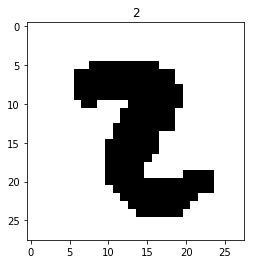

In [20]:
index = find_first_num(train_labels, 2)
dist = distance.cdist(train_images, train_images.iloc[[index]], 'euclidean')

t=0

for i in range(len(dist)):
    if dist[i] != 0:
        if dist[i]<dist[t]:
            t=i
            
show_digit(train_images, train_labels, t)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


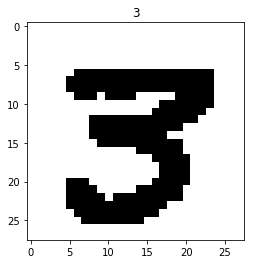

In [21]:
index = find_first_num(train_labels, 3)
dist = distance.cdist(train_images, train_images.iloc[[index]], 'euclidean')

t=0

for i in range(len(dist)):
    if dist[i] != 0:
        if dist[i]<dist[t]:
            t=i
            
show_digit(train_images, train_labels, t)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


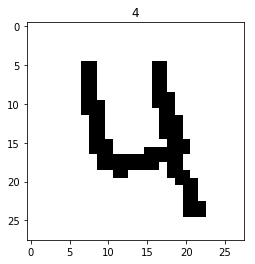

In [22]:
index = find_first_num(train_labels, 4)
dist = distance.cdist(train_images, train_images.iloc[[index]], 'euclidean')

t=0

for i in range(len(dist)):
    if dist[i] != 0:
        if dist[i]<dist[t]:
            t=i

# this is the first incorrect match. We received a 9 instead of a 4
show_digit(train_images, train_labels, t)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


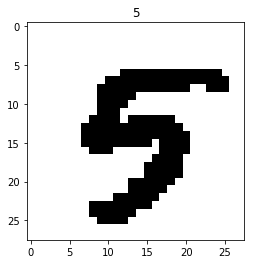

In [23]:
index = find_first_num(train_labels, 5)
dist = distance.cdist(train_images, train_images.iloc[[index]], 'euclidean')

t=0

for i in range(len(dist)):
    if dist[i] != 0:
        if dist[i]<dist[t]:
            t=i
            
show_digit(train_images, train_labels, t)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


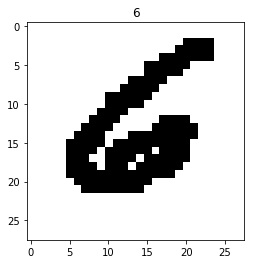

In [24]:
index = find_first_num(train_labels, 6)
dist = distance.cdist(train_images, train_images.iloc[[index]], 'euclidean')

t=0

for i in range(len(dist)):
    if dist[i] != 0:
        if dist[i]<dist[t]:
            t=i
            
show_digit(train_images, train_labels, t)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


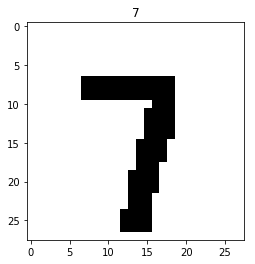

In [25]:
index = find_first_num(train_labels, 7)
dist = distance.cdist(train_images, train_images.iloc[[index]], 'euclidean')

t=0

for i in range(len(dist)):
    if dist[i] != 0:
        if dist[i]<dist[t]:
            t=i
            
show_digit(train_images, train_labels, t)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


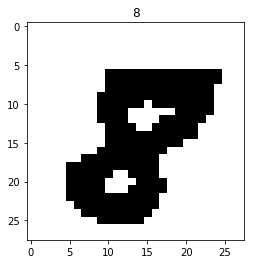

In [26]:
index = find_first_num(train_labels, 8)
dist = distance.cdist(train_images, train_images.iloc[[index]], 'euclidean')

t=0

for i in range(len(dist)):
    if dist[i] != 0:
        if dist[i]<dist[t]:
            t=i
            
show_digit(train_images, train_labels, t)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()


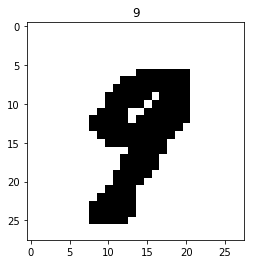

In [27]:
index = find_first_num(train_labels, 9)
dist = distance.cdist(train_images, train_images.iloc[[index]], 'euclidean')

t=0

for i in range(len(dist)):
    if dist[i] != 0:
        if dist[i]<dist[t]:
            t=i
            
show_digit(train_images, train_labels, t)

In [28]:
# Question 1.(e) 

# to do a binary comparison between 0s and 1s, first extract a list of all the zeros in the training data, and then
# extract a list of all the ones.

list_ones = []
for i in range(0,len(train_labels)):
    if train_labels.iloc[i,0]==1:
        list_ones.append(train_images.iloc[i])


In [29]:
list_zeros = []
for i in range(0,len(train_labels)):
    if train_labels.iloc[i,0]==0:
        list_zeros.append(train_images.iloc[i])


In [30]:
import numpy as np

In [31]:
# convert the lists into arrays so that we can use the cdist calculation on them for the euclidean distance
array_ones=np.array(list_ones)
array_zeros=np.array(list_zeros)

In [32]:
# our "Genuine" distances will be the following distances appended:
# ones to ones
# zeros to zeros
# our "Imposter" distances will be the following distances appended:
# zeros to ones
# ones to zeros

distances_ones= distance.cdist(array_ones, array_ones, 'euclidean')
distances_zeros= distance.cdist(array_zeros, array_zeros, 'euclidean')
distances_oneszeros= distance.cdist(array_zeros, array_ones, 'euclidean')
distances_zerosones= distance.cdist(array_zeros, array_ones, 'euclidean')

In [33]:
tp_distances=np.append(distances_ones,distances_zeros)

In [34]:
fp_distances = np.append(distances_oneszeros,distances_zerosones)

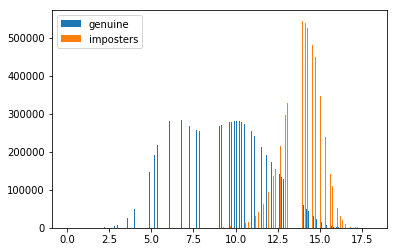

In [35]:
# if we plot these distances onto a histogram, we can clearly see the distance spread of both genuine and imposter

plt.hist([tp_distances,fp_distances], bins='auto', label=['genuine', 'imposters'])
plt.legend()

In [36]:
# Question 1.(f) 

# to plot the ROC curve, we first have to establish what our thresholds will be, and then calculate the TPR and FPR
# at each threshold

# we will use 10 thresholds 'x', iterated from 0 to the maximum distance of the two distance arrays
max_dist = max(max(fp_distances),max(tp_distances))
x = np.linspace(0, max_dist, num=10)

In [38]:
TPR_list = []
FPR_list = []

for i in x:
    
    # set the conditions for what will be a TP, FP, TN, FN
    cond1 = tp_distances > i
    cond2 = fp_distances > i
    
    # count the values on each side of the threshold for each distance array
    false_negative = list(cond1).count(True)
    true_positive = list(cond1).count(False)
    false_positive = list(cond2).count(False)
    true_negative = list(cond2).count(True)
    
    # calculate the TPR and FPR
    true_positive_rate = (float(true_positive) / float(true_positive + false_negative))
    false_positive_rate = (float(false_positive) / float(true_negative + false_positive))
    
    # add the TPR and FPR at each threshold point so that we can plot it later
    TPR_list.append(true_positive_rate)
    FPR_list.append(false_positive_rate)

In [270]:
area_under_curve = np.sum(TPR_list)/100
area_under_curve

0.23156767637772474

Text(0.5,0,'FPR')

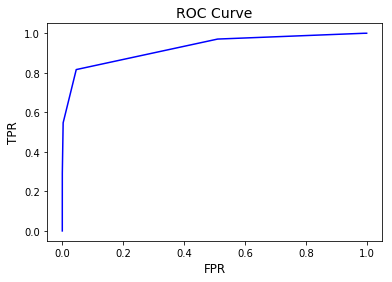

In [39]:
# plot the ROC curve using the above calculated values

plt.plot(FPR_list, TPR_list,'b')
plt.title("ROC Curve", fontsize=14)
plt.ylabel('TPR', fontsize=12)
plt.xlabel('FPR', fontsize=12)

In [40]:
# Question 1.(g)

# See below for our kNN Classifier. We were unable to get this to work correctly for the remaining questions in
# assignment, so for the remaining questions in part 1 we have used the sklearn KNeighborsClassifier to determine
# the predictions

In [41]:
# Question 1.(g) Build your own kNN classifier.
def get_neighbors(trainer, labels, tester, k):
    knn_dist = []
    for x in range(len(trainer)):
        new_dist = distance.cdist(tester, trainer.iloc[[x]], 'euclidean')
        knn_dist.append([labels.iloc[x,0], new_dist])

    knn_dist.sort(key=lambda x: x[1][0])
    neighbors = knn_dist[:k]
    return neighbors    

In [42]:
from collections import Counter

def majority(neighbors):
    label_list = []
    for i in range(len(neighbors)):
        label_list.append(neighbors[i][0])
    #print label_list 

    c = Counter(label_list)
    c.most_common()
    value, count = c.most_common()[0]
    return value

In [43]:
# Question 1.(h)

# split the train data into training and testing values
new_train_images, new_test_images,new_train_labels, new_test_labels = train_test_split(train_images, train_labels, train_size=0.5, random_state=0)

/Users/Meera/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [44]:
# Due to issues encountered in 1.(g), we have used the sklearn KNeighborsClassifier for this question.

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(10)
model.fit(new_train_images, new_train_labels)

/Users/Meera/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [45]:
pred=model.predict(new_test_images)

In [46]:
print(pred)

[3 6 9 ... 5 8 6]


In [47]:
# Question 1.(i) 

# generate a confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(new_train_labels, pred))

[[193 261 207 212 199 181 220 211 188 196]
 [242 279 231 235 213 207 239 220 202 261]
 [206 236 183 203 195 174 234 219 177 218]
 [210 251 198 196 209 185 218 234 223 236]
 [211 232 185 203 176 181 201 235 193 229]
 [219 199 184 220 190 157 197 188 165 182]
 [189 248 212 224 172 192 211 213 181 218]
 [220 280 244 240 197 167 234 218 185 225]
 [225 237 202 226 180 190 175 234 184 219]
 [214 279 210 209 195 176 209 217 186 214]]


In [48]:
# check the accuracy of your model

model.score(new_test_images,new_test_labels)

0.9525714285714286

In [49]:
# test with the given test data from Kaggle

test_data = pd.read_csv('test.csv')
test_data[test_data > 0] = 1
results = model.predict(test_data)

In [50]:
# save the results into a csv file to submit to Kaggle

df = pd.DataFrame(results)
df.index.name='ImageId'
df.index+=1
df.columns=['Label']
df.to_csv('HW1_part1_results.csv', header=True)